In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import warnings

warnings.filterwarnings(action='ignore')
%matplotlib inline

# 한글 폰트 설정
plt.rcParams["font.family"] = "Malgun Gothic"  # Windows (맑은 고딕)
# 마이너스 기호 깨짐 방지
plt.rcParams["axes.unicode_minus"] = False

# **Week1**

## **TASK 1. 데이터 출처 / 데이터 불러오기**
-  [kaggle_Health Insurance Cross Sell Prediction 🏠 🏥](https://www.kaggle.com/datasets/anmolkumar/health-insurance-cross-sell-prediction/data)
- 데이터 선정 이유: 보험 분야에서의 머신러닝 활용을 직접 해보고자!

In [2]:
train = pd.read_csv('./data/train.csv')
test = pd.read_csv('./data/test.csv')

In [3]:
train.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [4]:
test.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,381110,Male,25,1,11.0,1,< 1 Year,No,35786.0,152.0,53
1,381111,Male,40,1,28.0,0,1-2 Year,Yes,33762.0,7.0,111
2,381112,Male,47,1,28.0,0,1-2 Year,Yes,40050.0,124.0,199
3,381113,Male,24,1,27.0,1,< 1 Year,Yes,37356.0,152.0,187
4,381114,Male,27,1,28.0,1,< 1 Year,No,59097.0,152.0,297


## **TASK 2. 기초 통계량 확인**

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


In [6]:
int_var = train[['id', 'Age', 'Driving_License', 'Region_Code', 'Previously_Insured', 'Annual_Premium', 'Policy_Sales_Channel', 'Vintage', 'Response']]
obj_var = train[['Gender', 'Vehicle_Age', 'Vehicle_Damage', 'Policy_Sales_Channel', 'Driving_License', 'Previously_Insured']]

### 수치형 변수(int, float)
- id: 고객 식별을 위한 변수 -> 통계 무의미
- Driving_License, Previously_Insured, Response(Y변수) : 범주형 변수(1/0)
- Region_Code, Policy_Sales_Channel: float이지만 사실상 범주형 변수
- **Annual_Premium, Vintage, Age** → 연속형 변수
  - Age: 20대 ~ 80대까지 존재 / 2-30대가 많은 듯?
  - Annual_Premium: 2630 ~ 540165 / 평균에 비해 최댓값이 커서 이상값 확인해보기 !
  - Vintage: 10~299

In [7]:
int_var.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,190555.000000,38.822584,0.997869,26.388807,0.458210,30564.389581,112.034295,154.347397,0.122563
std,110016.836208,15.511611,0.046110,13.229888,0.498251,17213.155057,54.203995,83.671304,0.327936
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,95278.000000,25.000000,1.000000,15.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,190555.000000,36.000000,1.000000,28.000000,0.000000,31669.000000,133.000000,154.000000,0.000000
75%,285832.000000,49.000000,1.000000,35.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
max,381109.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


### 범주형 변수(object)
- gender: 남/여 → 남자 비율이 더 높음
- Vehicle_Age: 1-2년 정도된 자동차 소유자가 많음 
- Vehicle_Damage: 차량 손상여부 → 비슷함 
→ 활용전, 인코딩 필요! 


In [8]:
for i in range(obj_var.shape[1]):
    category = np.unique(obj_var.iloc[:,i])
    print(f'{obj_var.columns[i]}: {category} ')

Gender: ['Female' 'Male'] 
Vehicle_Age: ['1-2 Year' '< 1 Year' '> 2 Years'] 
Vehicle_Damage: ['No' 'Yes'] 


In [9]:
obj_var.describe()

,Gender,Vehicle_Age,Vehicle_Damage
count,381109,381109,381109
unique,2,3,2
top,Male,1-2 Year,Yes
freq,206089,200316,192413


### 변수 간단요약
<img src="https://github.com/leehj2586/Epoch/blob/main/Task/img/변수요약.png?raw=true" width="500">


## **TASK 3. 분석 목적/인사이트 설명**
- 목적: 건강 보험 가입 고객이 차량 보험에 가입할 가능성(Response=1)을 예측
    - 고객특성(연령, 운전면허 보유 여부, 차량 보유여부)와 차량특성(차량연식, 손상경험)을 이용하여 차량 보험 가능성 예측
- 문제 유형: 이진 분류(Binary Classification) 문제
- 얻을 수 있는 인사이트   
    1) 고객 특성과 보험 가입 가능성 간의 관계
        - 연령(Age)과 가입 의향(Response)의 관계
        - 운전면허 보유 여부(Driving_License)
        - 기존 차량 보험 여부(Previously_Insured)
    2) 차량 관련 정보와 가입 의향 분석
        - 차량 연식(Vehicle_Age)과 가입률
        - 사고 경험(Vehicle_Damage)과 가입 의향

# **Week2**

In [158]:
int_var = train[['id', 'Age', 'Annual_Premium', 'Vintage', 'Response']]
obj_var = train[['Gender', 'Vehicle_Age', 'Vehicle_Damage', 'Policy_Sales_Channel', 'Region_Code', 'Driving_License', 'Previously_Insured']]
for i in range(obj_var.shape[1]):
    category = np.unique(obj_var.iloc[:,i])
    print(f'{obj_var.columns[i]}: {category} ')

Gender: ['Female' 'Male'] 
Vehicle_Age: ['1-2 Year' '< 1 Year' '> 2 Years'] 
Vehicle_Damage: ['No' 'Yes'] 
Policy_Sales_Channel: [  1.   2.   3.   4.   6.   7.   8.   9.  10.  11.  12.  13.  14.  15.
  16.  17.  18.  19.  20.  21.  22.  23.  24.  25.  26.  27.  28.  29.
  30.  31.  32.  33.  34.  35.  36.  37.  38.  39.  40.  41.  42.  43.
  44.  45.  46.  47.  48.  49.  50.  51.  52.  53.  54.  55.  56.  57.
  58.  59.  60.  61.  62.  63.  64.  65.  66.  67.  68.  69.  70.  71.
  73.  74.  75.  76.  78.  79.  80.  81.  82.  83.  84.  86.  87.  88.
  89.  90.  91.  92.  93.  94.  95.  96.  97.  98.  99. 100. 101. 102.
 103. 104. 105. 106. 107. 108. 109. 110. 111. 112. 113. 114. 115. 116.
 117. 118. 119. 120. 121. 122. 123. 124. 125. 126. 127. 128. 129. 130.
 131. 132. 133. 134. 135. 136. 137. 138. 139. 140. 143. 144. 145. 146.
 147. 148. 149. 150. 151. 152. 153. 154. 155. 156. 157. 158. 159. 160.
 163.] 
Region_Code: [ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 

## **Task1: EDA - 변수 간관계 분석 및 시각화**

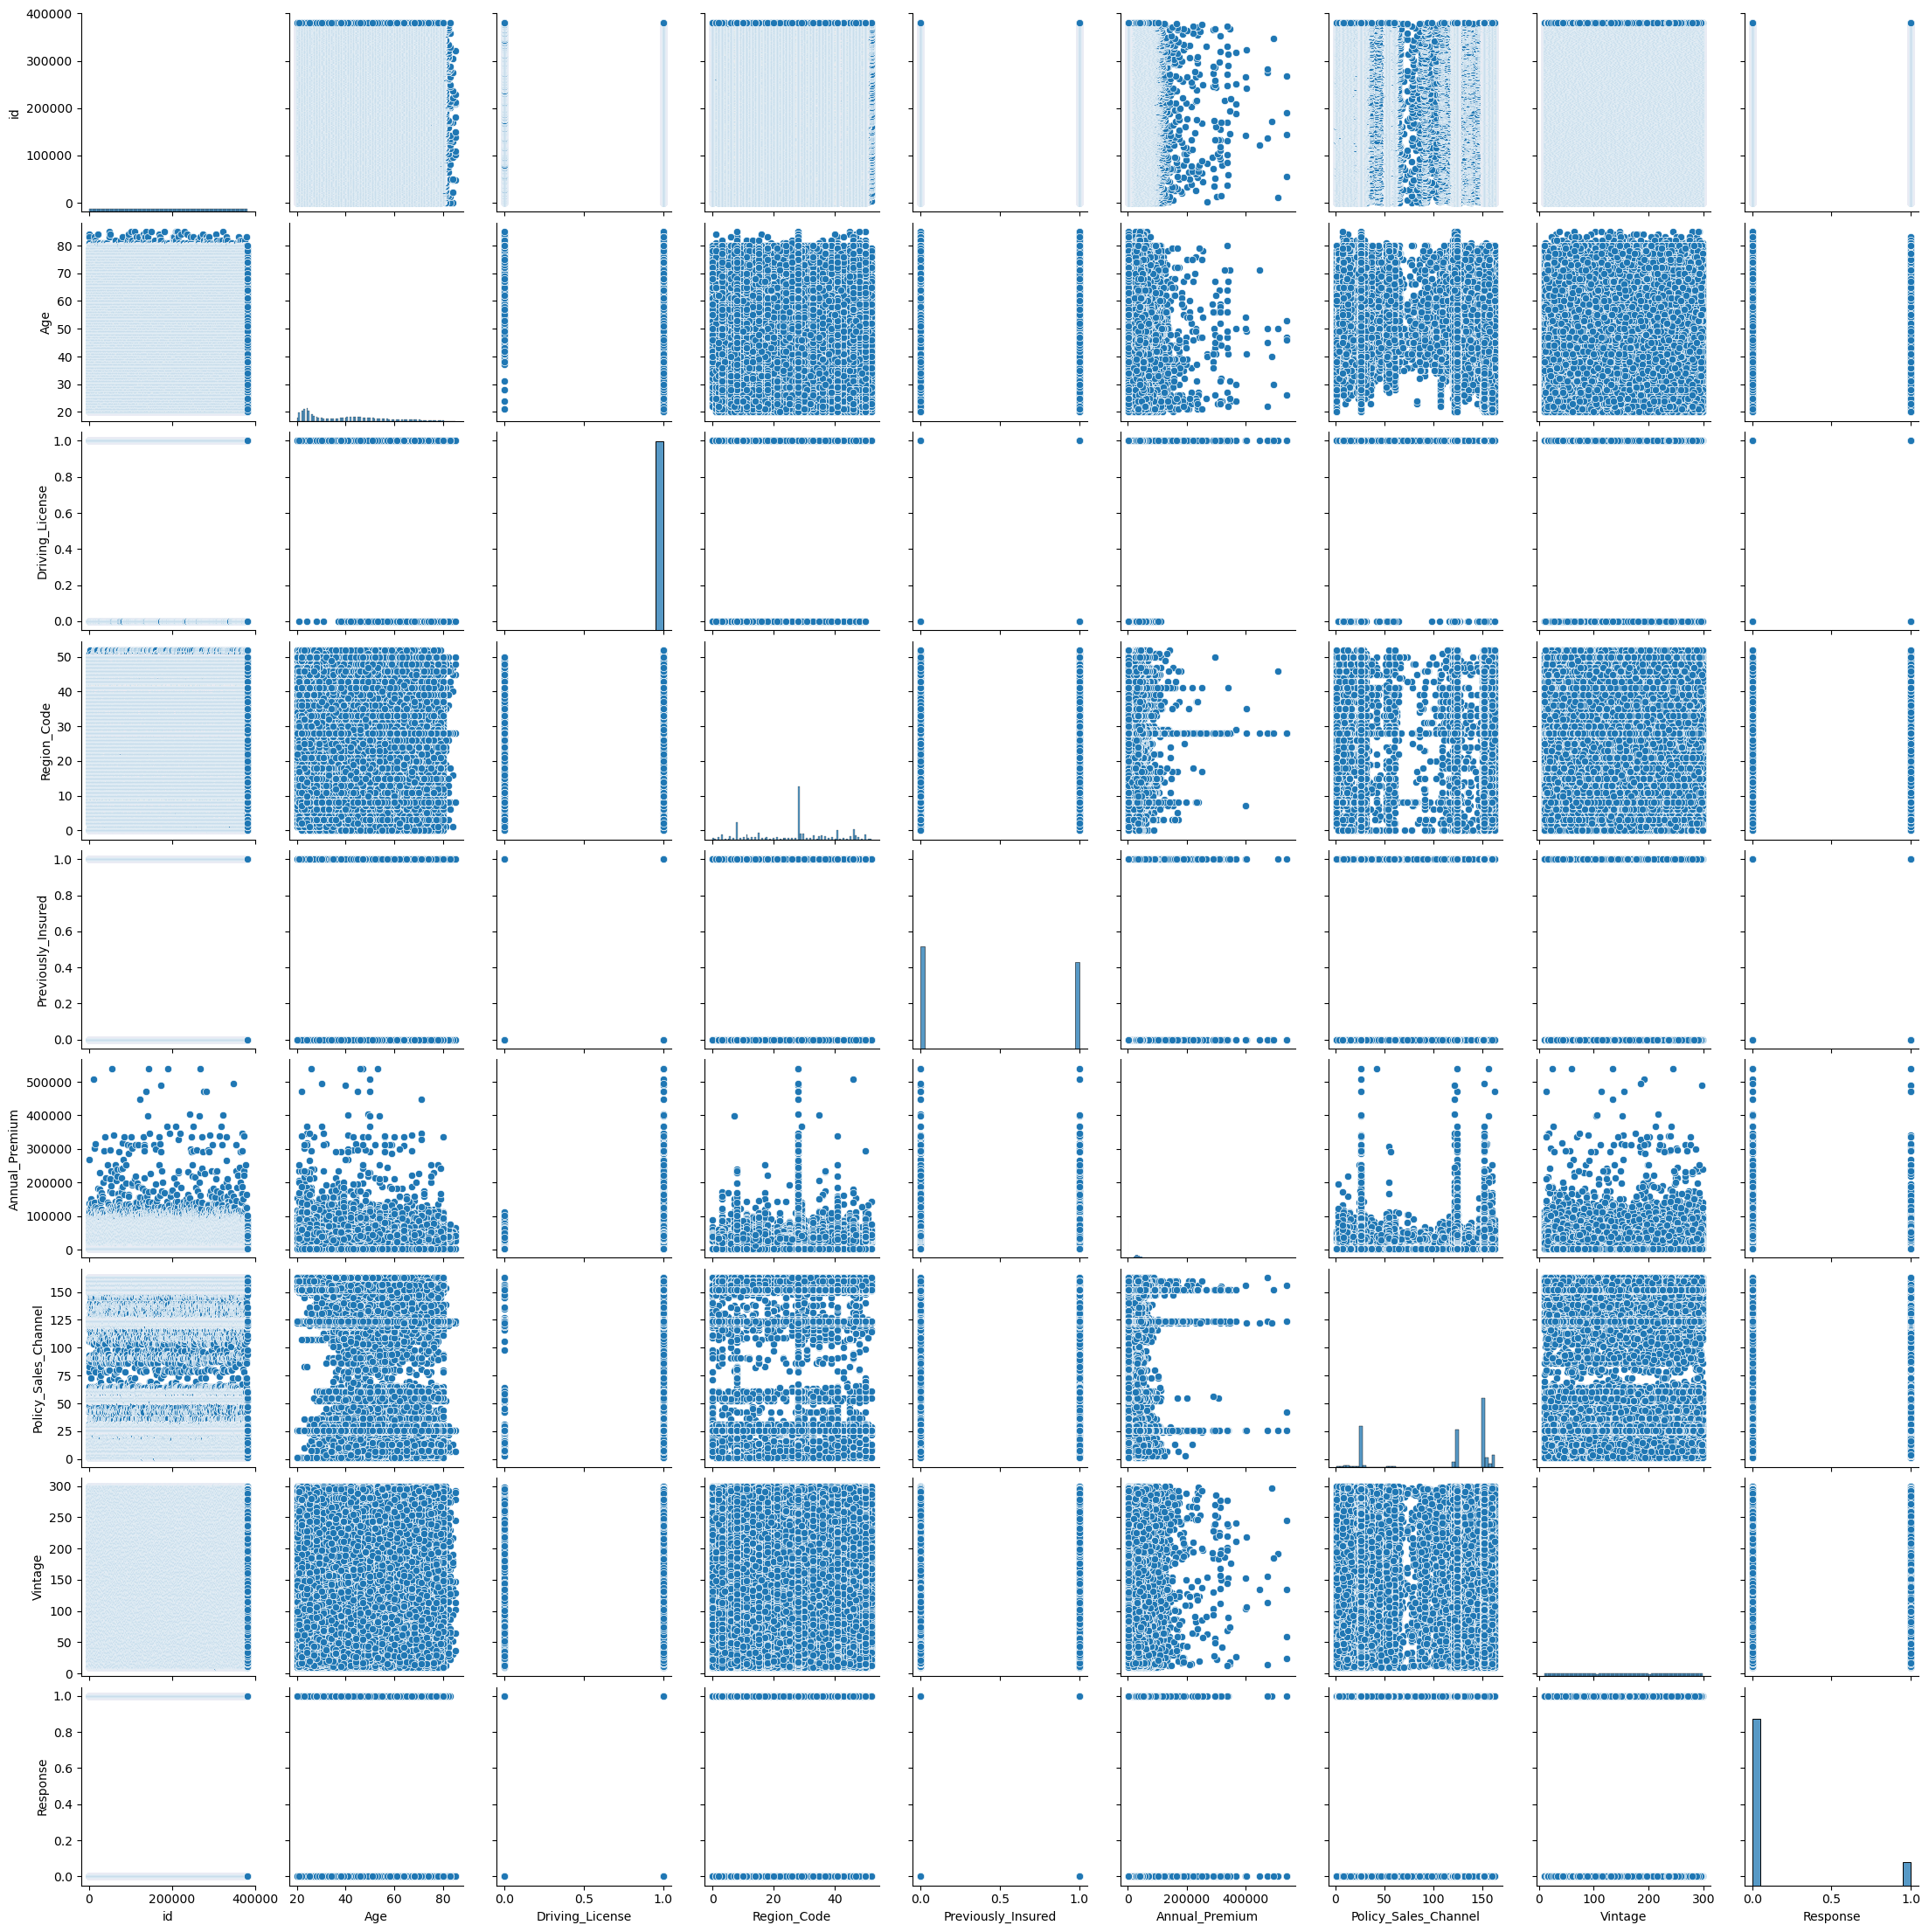

In [11]:
sns.pairplot(train)

### 1) 수치형 변수: 나이, 연간 보험료, 고객이 보험사와 함께한 일 수

- 나이
  - 연령대가 다양하게 나타남 -> 20대가 가장 많긴 함.
  - 인원수가 아닌, 가입 여부에 따른 연령대의 분포 모양만 확인해보기

Text(0.5, 1.0, '고객의 연령대 분포')

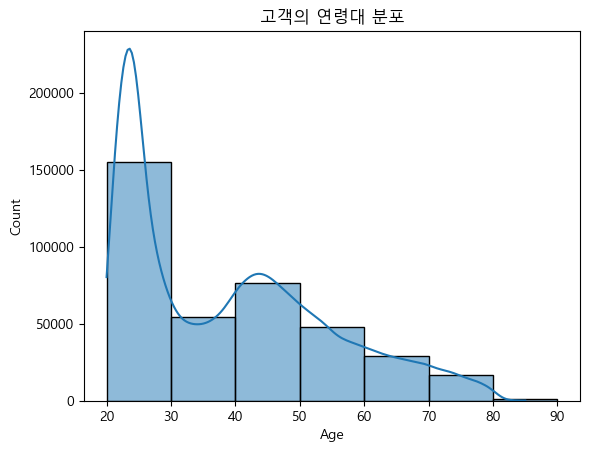

In [99]:
bins = [20, 30, 40, 50, 60, 70, 80, 90]
sns.histplot(train['Age'], bins = bins, kde=True)
plt.title("고객의 연령대 분포")

- 연간 보험료
  - 이상치가 10320개로, 전체의 36%를 차지 -> 박스플랏의 분포를 정확히 판단하기 어려움
  - 이상치를 제외한 데이터로 boxplot을 그려봄
    - 오른쪽으로 꼬리가 긴편, 봉우리가 2개가 나타난 부분 확인 필요

lower bound : 1912.5, upper bound: 61892.5 
 이상치 개수: 10320, 이상치 비율 = 36.93


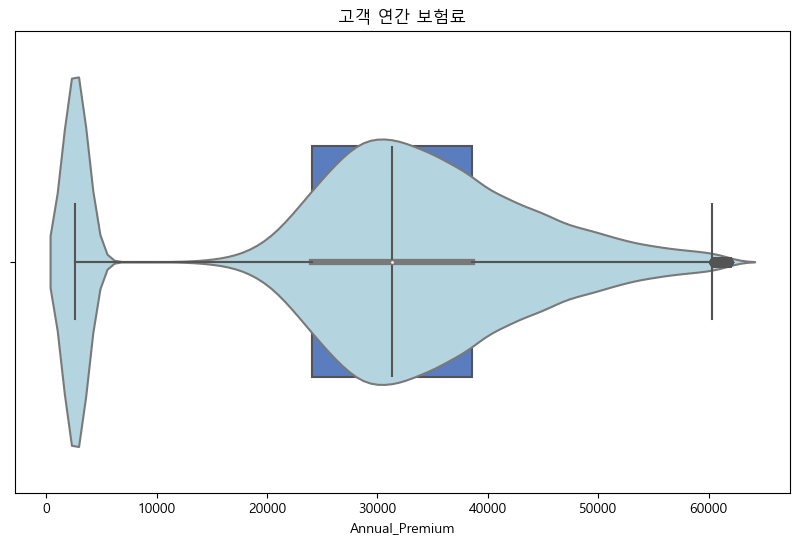

In [166]:
cost = train["Annual_Premium"]
q1 = cost.quantile(0.25)
q3 = cost.quantile(0.75)

IQR = q3-q1

lower = q1 - 1.5*IQR
upper = q3 + 1.5*IQR

outliers = train[(cost < lower) | (cost > upper)]
print(f'lower bound : {lower}, upper bound: {upper} \n 이상치 개수: {len(outliers)}, 이상치 비율 = {round(len(train)/len(outliers), 2)}')


filtered = train[(cost>=lower)&(cost<=upper)]

plt.figure(figsize = (10,6))

violin = sns.violinplot(x=filtered["Annual_Premium"], alpha = 0.3, color='lightblue')

''' 투명도 조절이 안된다.. 왜지...
for pc in violin.collections:
    if isinstance(pc, plt.Polygon):
        pc.set_alpha(0.3)
'''
sns.boxplot(x=filtered["Annual_Premium"], width=0.5)
plt.title("고객 연간 보험료")
plt.show()


- 회원 지속일 수 (기존 Vintage)
  - 일수로 나타낸 것이 가시성이 좋지 않다고 판단되어 30으로 나눠 개월 수 데이터로 바꾸어 그래프를 그려봄 
- 회원 지속개월 수 (파생 Vintage_Month)
  - 1개월 이하 회원 데이터는 많지 않은편
  - 2개월~10개월 회원수는 비슷하게 분포 

In [102]:
train["Vintage_Month"] = round(train['Vintage']/30,1)

(22500.0, 42494.55)

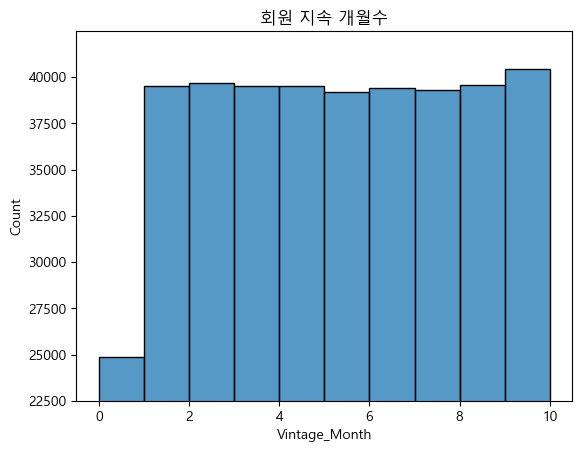

In [103]:
bins = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
sns.histplot(train["Vintage_Month"], bins = bins)
plt.title("회원 지속 개월수")
plt.ylim(22500, )

- 가입 여부에 따른 수치형 변수의 변화
  -> 각 변수별 코멘트는 아래 표에 정리 

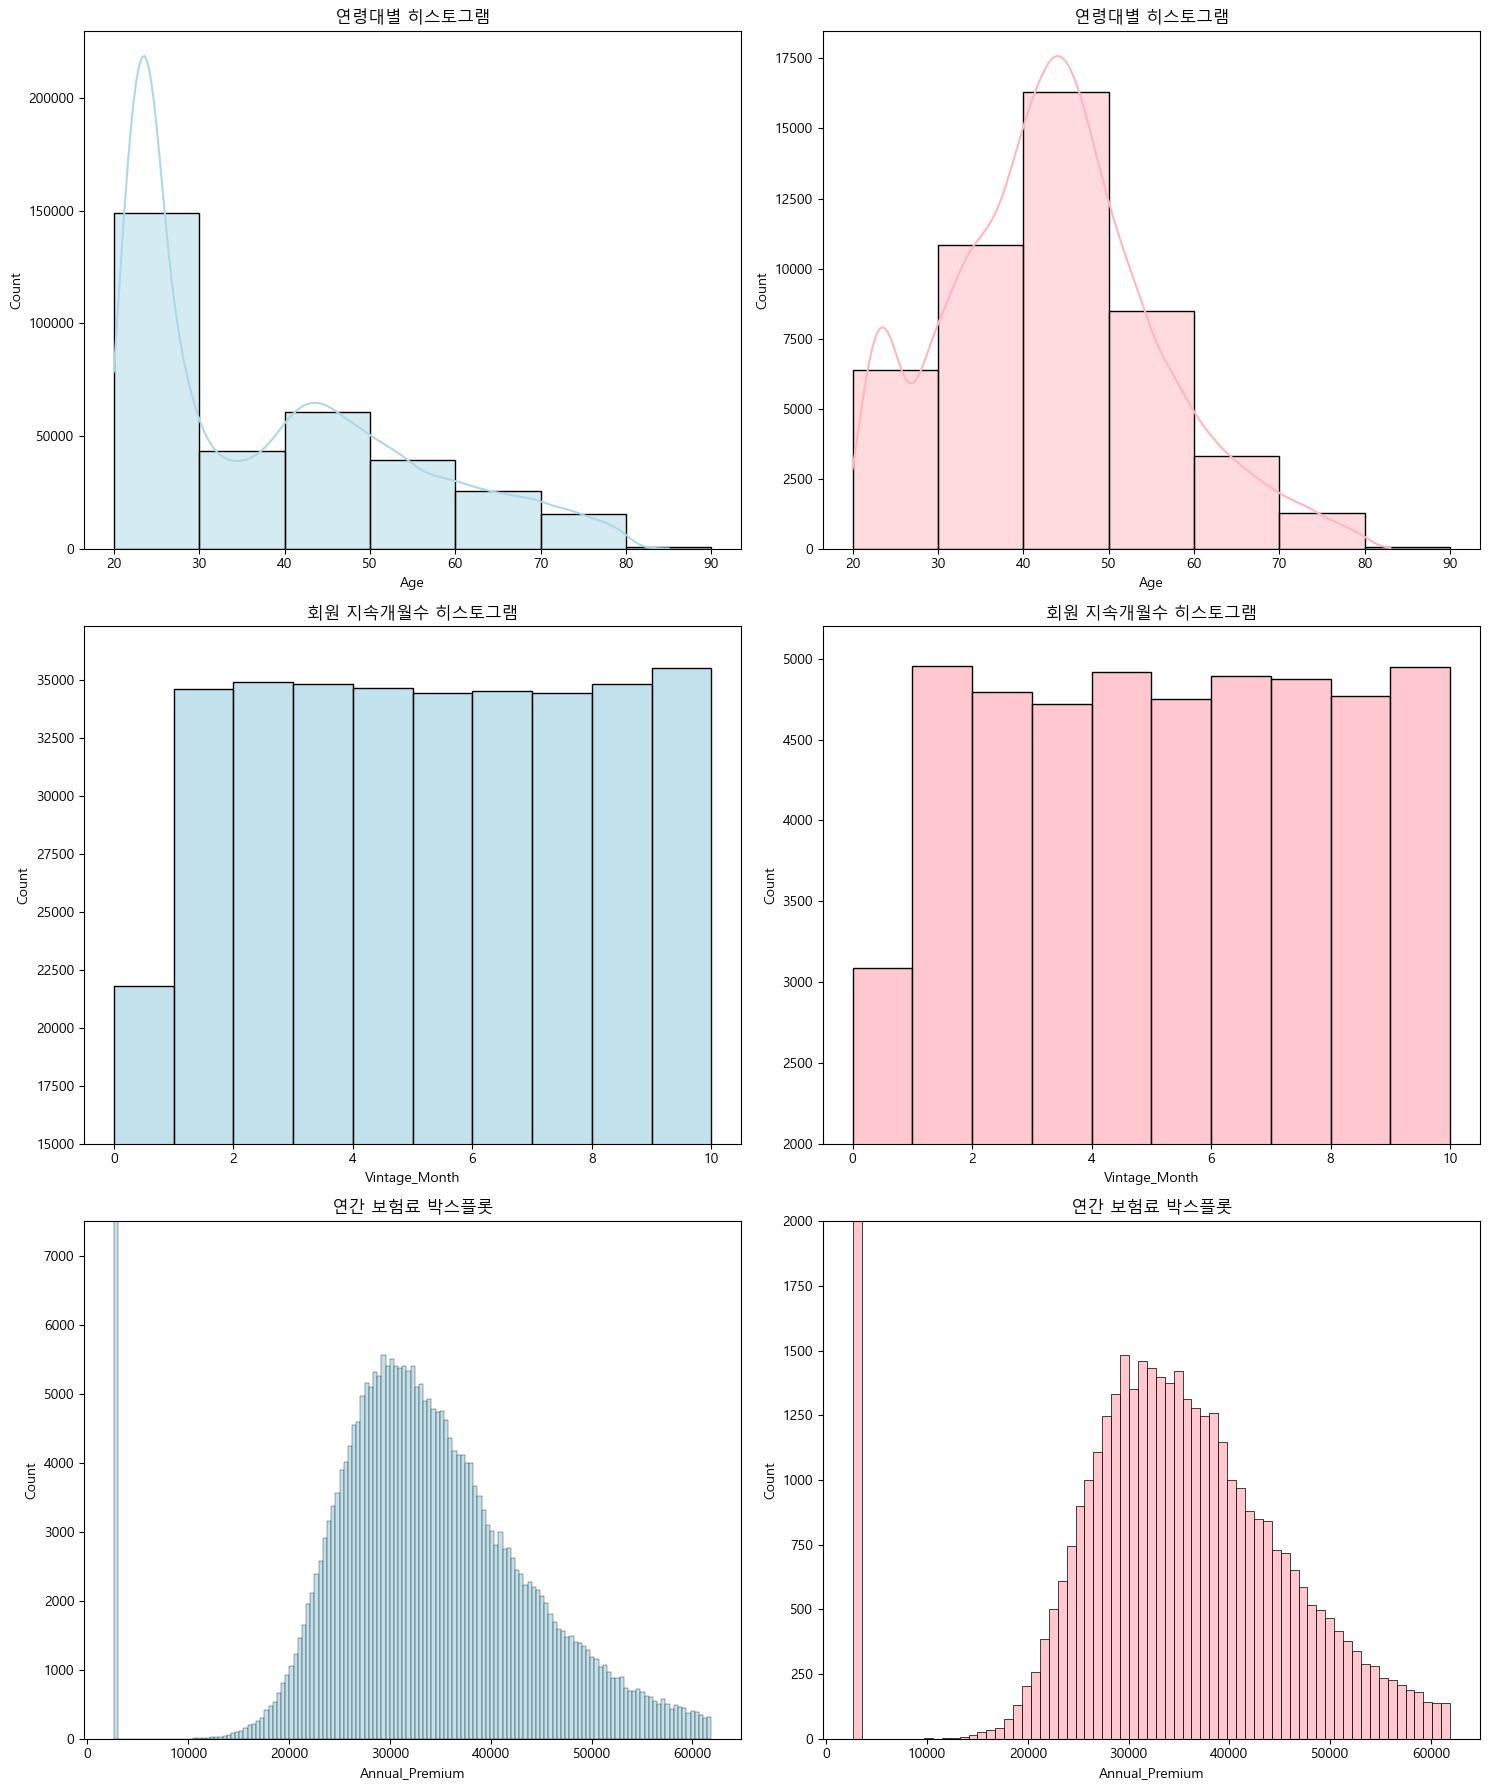

In [171]:
bin1 = [20, 30, 40, 50, 60, 70, 80, 90]
bin2 = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

# 타겟 변수별 그래프 그리기 
response_values = train['Response'].unique()

fig, axes = plt.subplots(3, 2, figsize=(15, 18))

# 연령 히스토그램
sns.histplot(train[train['Response'] == 0]['Age'], kde=True, bins=bin1, ax=axes[0, 0], label='Response 0', color = 'lightblue')
axes[0, 0].set_title('연령대별 히스토그램')

sns.histplot(train[train['Response'] == 1]['Age'], kde=True, bins=bin1, ax=axes[0, 1], label='Response 1', color = 'lightpink')
axes[0, 1].set_title('연령대별 히스토그램')

# 회원 지속 개월 수 박스플롯
sns.histplot(train[train['Response'] == 0]['Vintage_Month'], bins=bin2, ax=axes[1, 0], label='Response 0', color = 'lightblue')
axes[1, 0].set_title('회원 지속개월수 히스토그램')
axes[1, 0].set_ylim(15000,)

sns.histplot(train[train['Response'] == 1]['Vintage_Month'], bins=bin2, ax=axes[1, 1], label='Response 1', color = 'lightpink')
axes[1, 1].set_title('회원 지속개월수 히스토그램')
axes[1, 1].set_ylim(2000,)

# 연간 보험료 박스플롯
filtered = train[(cost>=lower)&(cost<=upper)]

sns.histplot(filtered[filtered['Response'] == 0]['Annual_Premium'], ax=axes[2, 0], label='Response 0', color = 'lightblue')
axes[2, 0].set_title('연간 보험료 박스플롯')
axes[2, 0].set_ylim(bottom=None, top=7500)

sns.histplot(filtered[filtered['Response'] == 1]['Annual_Premium'], ax=axes[2, 1], label='Response 1', color = 'lightpink')
axes[2, 1].set_title('연간 보험료 박스플롯')
axes[2, 1].set_ylim(bottom=None, top=2000)

# 레이아웃 자동 조정
plt.tight_layout()
plt.show()

### 2) 범주형 변수: 성별, 차량 연식, 차량 손상여부

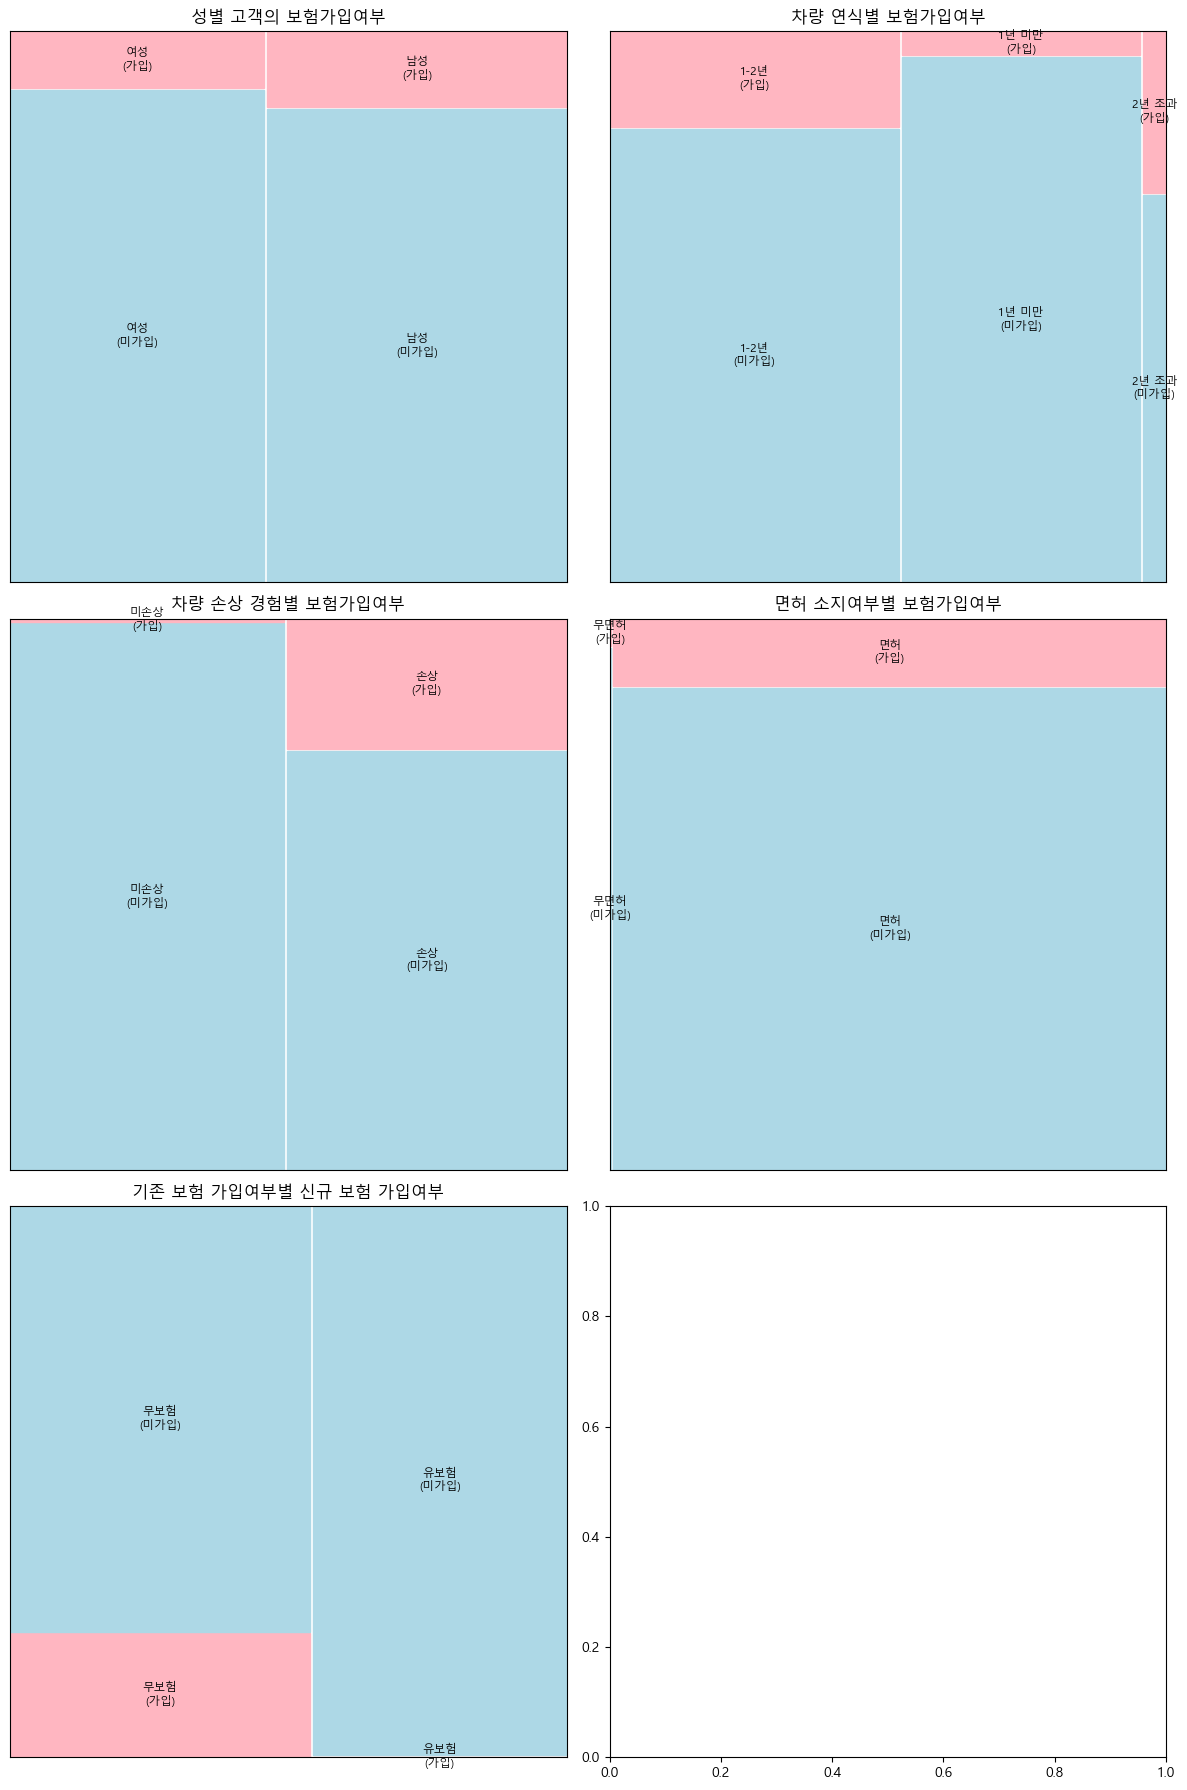

In [175]:
from statsmodels.graphics.mosaicplot import mosaic
import matplotlib.pyplot as plt

fig, axes = plt.subplots(3, 2, figsize=(12, 18))  # 3행 1열로 서브플롯 설정

# 성별 보험가입 여부 그래프
props = lambda key: {'color': 'lightpink' if '1' in key else 'lightblue'}
labelizer = lambda k: {('Female','1'): '여성\n(가입)', ('Female','0'): '여성\n(미가입)',
                        ('Male','1'): '남성\n(가입)', ('Male', '0'): '남성\n(미가입)'}[k]

mosaic(train.sort_values('Gender'),
       ['Gender', 'Response'],
       properties=props,
       labelizer=labelizer,
       axes_label=False,
       ax=axes[0,0])  # 첫 번째 서브플롯에 그래프 그리기
axes[0,0].set_title('성별 고객의 보험가입여부')

# 차량 연식별 보험가입 여부 그래프
color_map = {
    ('1-2 Year', '1'): 'lightpink',
    ('1-2 Year', '0'): 'lightblue',
    ('< 1 Year', '1'): 'lightpink',
    ('< 1 Year', '0'): 'lightblue',
    ('> 2 Years', '1'): 'lightpink',
    ('> 2 Years', '0'): 'lightblue'
}

props = lambda key: {'color': color_map[key]}

labelizer = lambda k: {
    ('1-2 Year', '1'): '1-2년\n(가입)',
    ('1-2 Year', '0'): '1-2년\n(미가입)',
    ('< 1 Year', '1'): '1년 미만\n(가입)',
    ('< 1 Year', '0'): '1년 미만\n(미가입)',
    ('> 2 Years', '1'): '2년 초과\n(가입)',
    ('> 2 Years', '0'): '2년 초과\n(미가입)'
}[k]

mosaic(train.sort_values('Vehicle_Age'),
       ['Vehicle_Age', 'Response'],
       properties=props,
       labelizer=labelizer,
       axes_label=False,
       ax=axes[0,1])  # 두 번째 서브플롯에 그래프 그리기
axes[0,1].set_title('차량 연식별 보험가입여부')

# 차량 손상 경험별 보험가입 여부 그래프
props = lambda key: {'color': 'lightpink' if '1' in key else 'lightblue'}
labelizer = lambda k: {('No','1'): '미손상\n(가입)', ('No','0'): '미손상\n(미가입)',
                        ('Yes','1'): '손상\n(가입)', ('Yes', '0'): '손상\n(미가입)'}[k]

mosaic(train.sort_values('Vehicle_Damage'),
       ['Vehicle_Damage', 'Response'],
       properties=props,
       labelizer=labelizer,
       axes_label=False,
       ax=axes[1,0])  # 세 번째 서브플롯에 그래프 그리기
axes[1,0].set_title('차량 손상 경험별 보험가입여부')

# 면허소지여부별 보험가입여부
props = lambda key: {'color': 'lightpink' if key[1] == '1' else 'lightblue'}  # 가입일 때 핑크, 미가입일 때 블루
labelizer = lambda k: {('0','1'): '무면허\n(가입)', ('0','0'): '무면허\n(미가입)',
                        ('1','1'): '면허\n(가입)', ('1', '0'): '면허\n(미가입)'}[k]

mosaic(train.sort_values('Driving_License'),
       ['Driving_License', 'Response'],
       properties=props,
       labelizer=labelizer,
       axes_label=False,
       ax=axes[1,1])  # 세 번째 서브플롯에 그래프 그리기
axes[1,1].set_title('면허 소지여부별 보험가입여부')

# 기존의 보험 가입여부별 신규 보험 가입여부
props = lambda key: {'color': 'lightpink' if key[1] == '1' else 'lightblue'}  # 가입일 때 핑크, 미가입일 때 블루
labelizer = lambda k: {('0','1'): '무보험\n(가입)', ('0','0'): '무보험\n(미가입)',
                        ('1','1'): '유보험\n(가입)', ('1', '0'): '유보험\n(미가입)'}[k]

mosaic(train.sort_values('Previously_Insured'),
       ['Previously_Insured', 'Response'],
       properties=props,
       labelizer=labelizer,
       axes_label=False,
       ax=axes[2,0])  # 세 번째 서브플롯에 그래프 그리기
axes[2,0].set_title('기존 보험 가입여부별 신규 보험 가입여부')

plt.tight_layout()  # 그래프 간격 자동 조정
plt.show()



## **Task2: 컬럼 분석 정리**

<img src="https://github.com/leehj2586/Epoch/blob/main/Task/img/Week2_칼럼정리.png?raw=true" width="500">